<a href="https://colab.research.google.com/github/SanjayKH-Git/Indian-Medicinal-Plant-Identifier-Using-Computer-Vision-Deep-Learning-/blob/main/plant_id_django.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd  # data processing
import os #  to interact with files using there paths
from sklearn.datasets import load_files

In [ ]:
#The path of our data on drive
data_dir =  r'/content/drive/MyDrive/Colab_Notebooks/Images/train'
 
#Loading our Data
data = load_files(data_dir)
import os
os.listdir(data_dir)

['Aloe_vera', 'Neem', 'Tulsi', 'Amla', 'Turmeric']

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/drive/MyDrive/Colab_Notebooks/Images/train/Tulsi/images96.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Amla/images73.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Turmeric/images201.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Tulsi/images103.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Turmeric/images (19).jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Turmeric/images14.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Aloe_vera/images130.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Neem/images68.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Turmeric/images (24).jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Amla/images (20).jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Turmeric/images174.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Neem/images196.jpg'
 '/content/drive/MyDrive/Colab_Notebooks/Images/train/Tulsi/images95.

In [ ]:
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)
    
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])


Number of training files :  852
Number of training targets :  852


In [ ]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])


(852, 150, 150, 3)
First training item :  [[[229. 229. 237.]
  [226. 226. 234.]
  [226. 226. 236.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[226. 226. 234.]
  [226. 226. 234.]
  [227. 227. 237.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[225. 225. 233.]
  [226. 226. 234.]
  [228. 228. 238.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[232. 232. 234.]
  [232. 232. 234.]
  [233. 232. 238.]
  ...
  [255. 250. 255.]
  [255. 251. 255.]
  [ 40.  28.  52.]]

 [[233. 233. 235.]
  [233. 233. 235.]
  [234. 233. 239.]
  ...
  [255. 254. 253.]
  [255. 254. 253.]
  [165. 151. 174.]]

 [[234. 234. 236.]
  [234. 234. 236.]
  [235. 234. 240.]
  ...
  [244. 244. 246.]
  [254. 254. 255.]
  [245. 246. 240.]]]


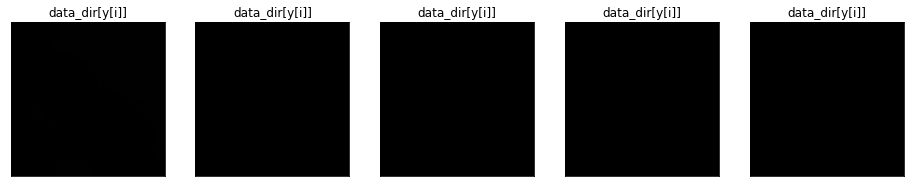

In [ ]:
#Let's look at first 5 training data.

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title("data_dir[y[i]]")

In [ ]:
# Let's resize or rescale training data
X = X.astype('float32')/255
 
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

5

In [ ]:
y

array([3, 1, 4, 3, 4, 4, 0, 2, 4, 1, 4, 2, 3, 4, 4, 4, 4, 2, 2, 4, 2, 3,
       2, 1, 4, 1, 0, 1, 1, 4, 0, 2, 4, 1, 0, 1, 0, 1, 0, 2, 3, 0, 3, 4,
       3, 1, 2, 4, 0, 4, 1, 2, 1, 1, 3, 0, 2, 1, 3, 2, 4, 1, 4, 4, 2, 2,
       2, 3, 3, 1, 4, 2, 4, 2, 4, 1, 2, 1, 1, 3, 3, 4, 1, 4, 2, 3, 2, 1,
       2, 3, 2, 2, 4, 1, 1, 2, 2, 0, 4, 2, 1, 1, 3, 4, 1, 3, 2, 1, 4, 2,
       0, 0, 2, 1, 1, 2, 1, 0, 3, 1, 4, 1, 1, 4, 3, 2, 3, 2, 0, 1, 0, 3,
       1, 1, 4, 4, 0, 2, 1, 1, 4, 1, 1, 1, 1, 2, 2, 1, 3, 2, 3, 1, 2, 1,
       4, 2, 0, 3, 1, 1, 3, 0, 1, 4, 0, 1, 1, 4, 4, 0, 4, 4, 3, 0, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 3, 4, 1, 2, 2, 3, 0, 4, 1, 1, 4, 1, 1, 4, 4,
       2, 4, 2, 4, 4, 1, 2, 2, 1, 0, 0, 2, 4, 1, 0, 0, 1, 0, 4, 2, 4, 1,
       2, 3, 0, 0, 4, 0, 3, 1, 1, 0, 4, 2, 0, 2, 1, 4, 0, 0, 1, 3, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 0, 4, 1, 1, 4, 4, 4, 2, 2, 3, 1, 0, 4, 3, 2,
       2, 1, 1, 1, 1, 4, 2, 3, 2, 0, 4, 1, 1, 2, 2, 2, 0, 4, 3, 1, 1, 4,
       0, 0, 1, 2, 4, 0, 1, 2, 0, 2, 4, 2, 4, 1, 2,

In [ ]:
from keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  171
The training Data Shape  86


In [ ]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
Maxpool_1 (MaxPooling2D)     (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
Conv2D_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
Maxpool_2 (MaxPooling2D)     (None, 36, 36, 64)       

In [ ]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 50
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = "/content/drive/My Drive/PId_Best.h5", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/50
21/21 [==============================] - 96s 4s/step - loss: 1.9072 - accuracy: 0.2551 - val_loss: 1.5910 - val_accuracy: 0.2209

Epoch 00001: val_loss improved from inf to 1.59104, saving model to /content/drive/My Drive/PId_Best.h5
Epoch 2/50
21/21 [==============================] - 94s 4s/step - loss: 1.5886 - accuracy: 0.2442 - val_loss: 1.5926 - val_accuracy: 0.2209

Epoch 00002: val_loss did not improve from 1.59104
Epoch 3/50
21/21 [==============================] - 93s 4s/step - loss: 1.5962 - accuracy: 0.2796 - val_loss: 1.5863 - val_accuracy: 0.2209

Epoch 00003: val_loss improved from 1.59104 to 1.58632, saving model to /content/drive/My Drive/PId_Best.h5
Epoch 4/50
21/21 [==============================] - 93s 4s/step - loss: 1.6019 - accuracy: 0.2585 - val_loss: 1.5819 - val_accuracy: 0.2209

Epoch 00004: val_loss improved from 1.58632 to 1.58192, saving model to /content/drive/My Drive/PId_Best.h5

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00050

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

3/3 - 3s - loss: 1.4591 - accuracy: 0.3765
Accuracy: 37.65%
Loss: 1.459098219871521


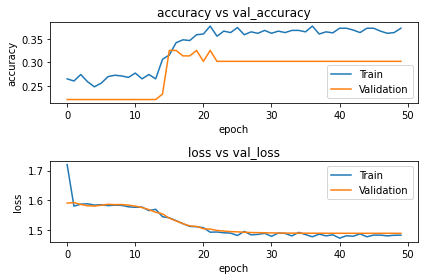

In [ ]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)
    #plt.figure(figsize=(10,10)) 
 
     # summarize history for accuracy  
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
     # summarize history for loss  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
# Finaly, let's call the plot function with the 'result' parameter 
 
plot(history)

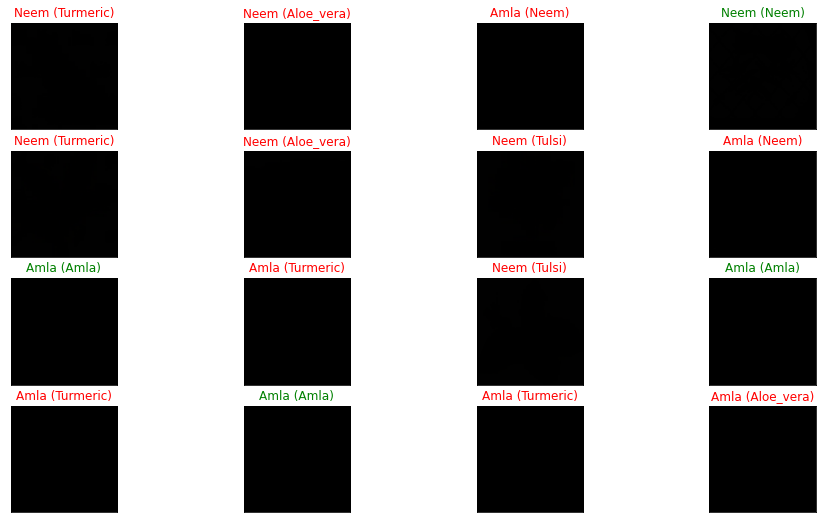

In [ ]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

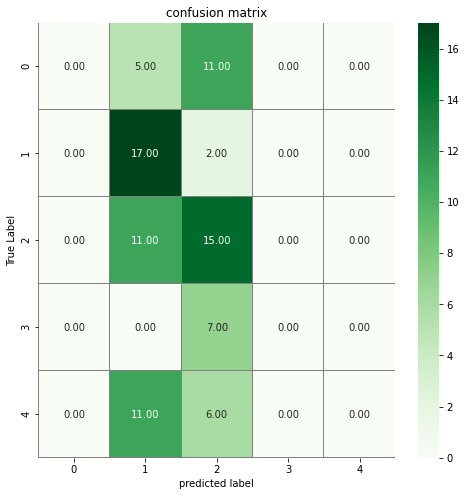

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
my_model=keras.models.load_model('/content/drive/My Drive/PId_Best.h5')

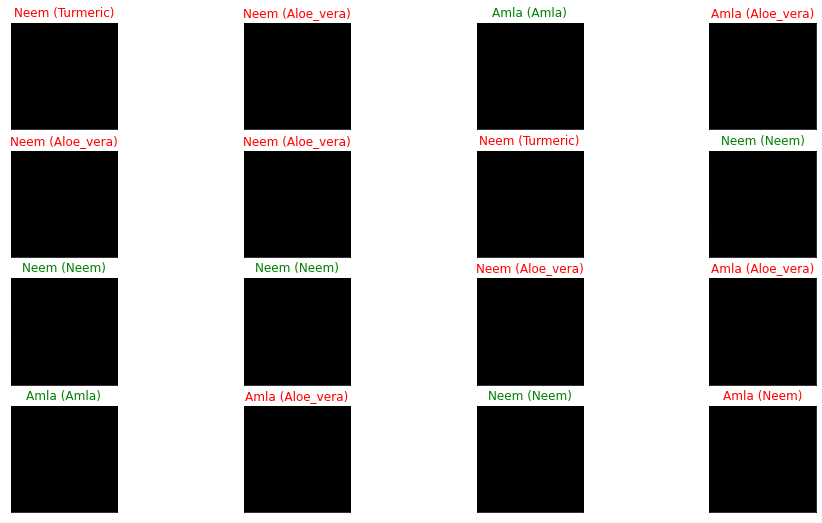

In [ ]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))
